In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

In [2]:
X_train=pd.read_csv('weather_data_train.csv',index_col='datetime',sep=';',decimal=',',infer_datetime_format=True)
X_train.head()

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
datetime,,,,,,,,,,,,,,,,
2006-09-20,14.4875,751.3000,751.6375,3.500,13.30,15.95,11.425,12.550,0.926964,1.008571,0.979821,1.142857,0.320,4.205,155.590714,1.994286
2006-09-21,14.1875,758.0625,758.3625,3.625,11.20,15.95,27.500,11.025,4.801250,7.965536,7.679821,0.267857,5.780,6.125,147.142857,1.942143
2006-09-22,15.3000,762.1125,762.4375,3.000,13.15,16.70,12.875,12.875,3.754286,1.824107,1.742679,0.857143,1.445,10.580,23.553571,0.122143
2006-09-23,14.0250,766.4000,766.7625,2.500,12.00,16.65,7.200,12.500,4.896429,0.417143,0.431250,0.285714,0.180,10.125,35.974286,0.968571
2006-09-24,14.2750,764.7125,765.0500,3.250,12.55,15.80,10.625,12.475,3.659286,1.672679,1.680000,0.785714,3.645,3.920,16.267857,1.005000


In [47]:
# data overview

print ('Rows     : ', X_train.shape[0])
print ('Columns  : ', X_train.shape[1])
print ('\nFeatures : \n', X_train.columns.tolist())
print ('\nMissing values :  ', X_train.isnull().sum().values.sum())
print ('\nUnique values :  \n', X_train.nunique())

Rows     :  3140
Columns  :  16

Features : 
 ['T_mu', 'Po_mu', 'P_mu', 'Ff_mu', 'Tn_mu', 'Tx_mu', 'VV_mu', 'Td_mu', 'T_var', 'Po_var', 'P_var', 'Ff_var', 'Tn_var', 'Tx_var', 'VV_var', 'Td_var']

Missing values :   0

Unique values :  
 T_mu      2224
Po_mu     2407
P_mu      2405
Ff_mu      138
Tn_mu      867
Tx_mu      879
VV_mu     1106
Td_mu     2196
T_var     3066
Po_var    3140
P_var     3139
Ff_var     480
Tn_var     564
Tx_var     570
VV_var    2587
Td_var    3047
dtype: int64


In [48]:
X_train.describe()

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,6.780096,758.805939,759.148643,3.674008,4.888025,8.661810,25.952053,3.373812,4.466326,4.062051,4.058249,1.345066,3.662163,4.132288,98.008192,2.768010
std,8.595021,8.521047,8.525485,1.222216,8.595641,8.910328,12.230215,8.083700,5.254302,7.278152,7.274098,1.255878,7.034635,5.929607,106.710901,4.497696
min,-19.312500,725.525000,725.875000,1.000000,-26.200000,-16.950000,0.625000,-22.912500,0.016429,0.005000,0.005714,0.000000,0.000000,0.000000,0.000000,0.008095
25%,0.987500,753.471875,753.821875,2.750000,-0.250000,2.250000,16.421875,-1.612500,0.928571,0.492604,0.500000,0.571429,0.125000,0.382500,20.408036,0.582143
50%,6.537500,758.850000,759.187500,3.500000,4.750000,8.125000,24.875000,3.118750,2.568839,1.516964,1.519107,0.982143,0.980000,2.000000,55.928571,1.313125
75%,13.953125,764.178125,764.525000,4.375000,11.950000,16.200000,35.375000,10.100000,6.169955,4.395759,4.418750,1.696429,3.920000,5.780000,140.008884,3.089107
max,25.787500,790.425000,790.812500,9.750000,23.150000,28.500000,50.000000,21.462500,66.571250,108.117143,108.515536,17.571429,93.845000,105.125000,645.760000,77.449821


In [3]:
y_train=pd.read_csv('weather_data_train_labels.csv',index_col='datetime',sep=';',decimal=',',infer_datetime_format=True)
y_train.shape

(3140, 2)

1    1902
0    1238
Name: OBSERVED, dtype: int64


Text(0.5, 1.0, 'Observed')

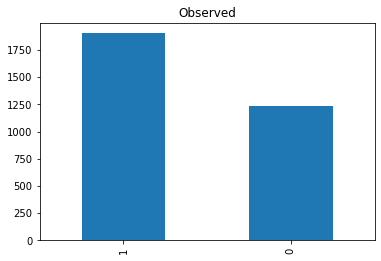

In [50]:
print(y_train.OBSERVED.value_counts())
y_train['OBSERVED'].value_counts().plot('bar').set_title('Observed')

In [51]:
# proportion of observed dry condition in train set
y_train.OBSERVED.value_counts()[1] / y_train.OBSERVED.count()

0.6057324840764331

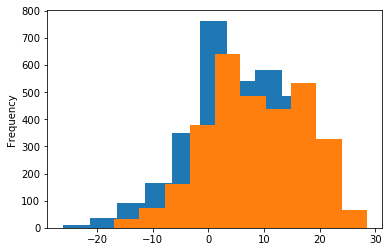

In [52]:
X_train.Tn_mu.plot.hist()
X_train.Tx_mu.plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc52ff287f0>,
      dtype=object)

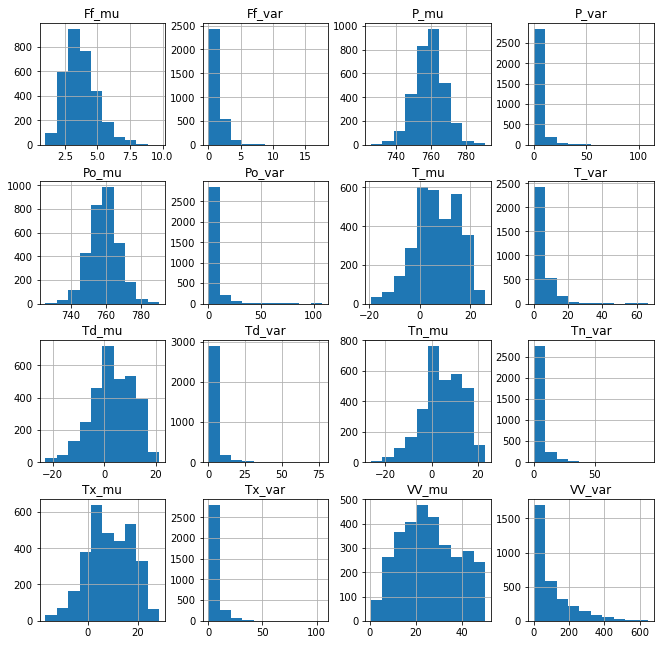

In [11]:
X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

In [4]:
trainset = pd.concat([X_train,y_train],axis=1)
trainset.shape

(3140, 18)

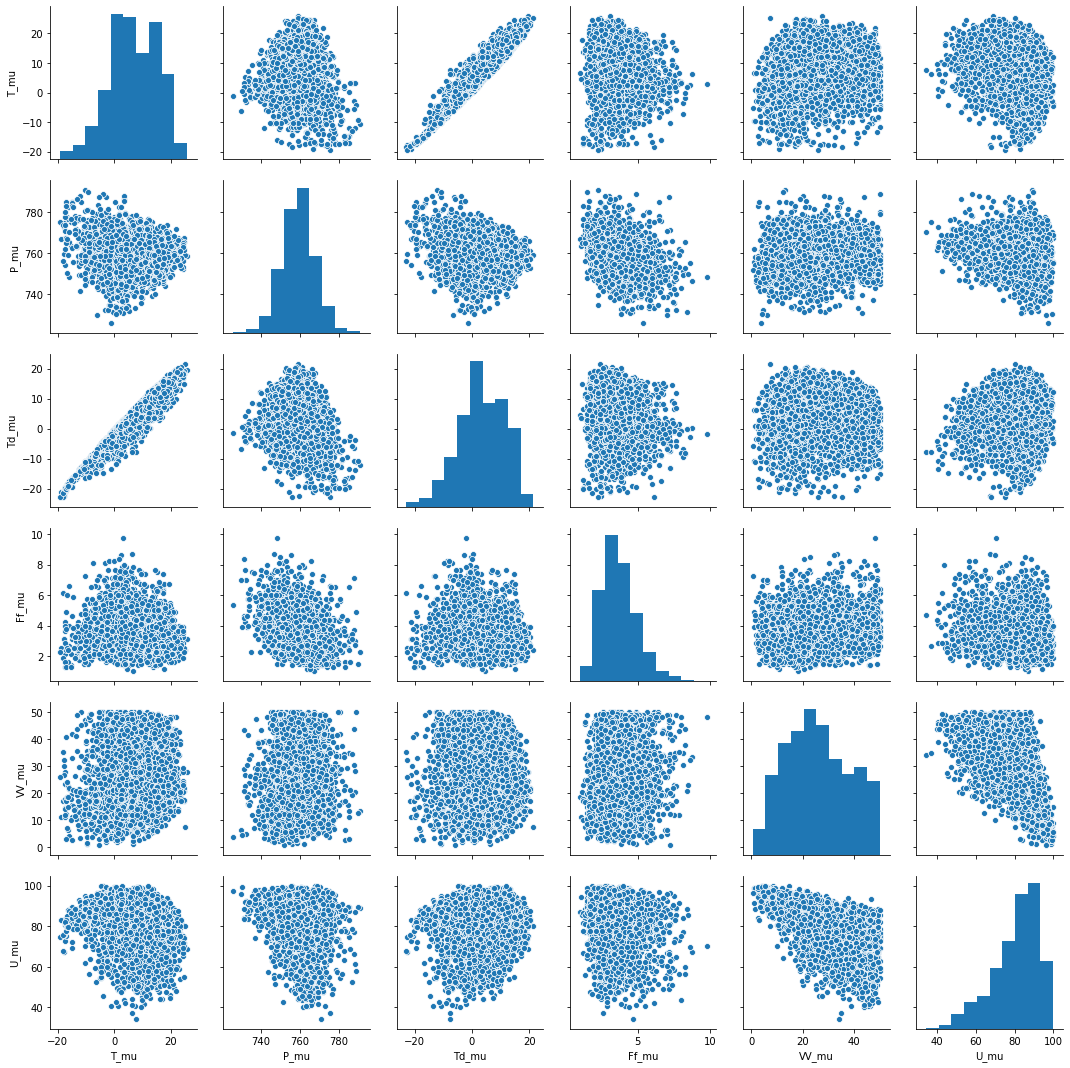

In [54]:
sns.pairplot(trainset[['T_mu','P_mu','Td_mu','Ff_mu','VV_mu','U_mu']])

In [12]:
#sns.pairplot(trainset, hue='OBSERVED', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)


(18.0, 0.0)

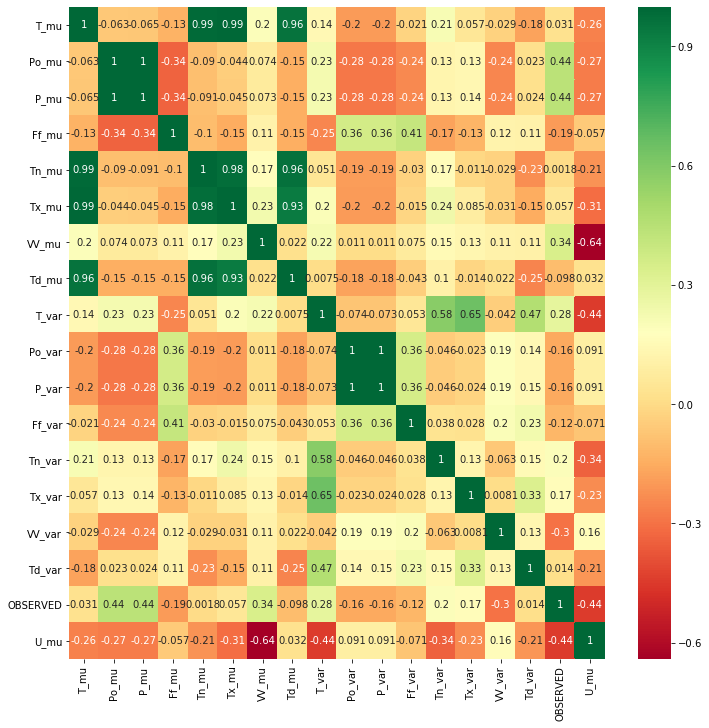

In [8]:
#correlation matrix (can use for feature selection)
#corrmat=trainset.corr()
#top_corr_features=corrmat.index
plt.figure(figsize=(12,12))
cor=trainset.corr()
ax=sns.heatmap(trainset.corr(method="pearson"),annot=True,linewidths=0,
    linecolor='white',cmap="RdYlGn")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [9]:
#Correlation with output variable (for classification)
cor_target = abs(cor["OBSERVED"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

Po_mu       0.440013
P_mu        0.439918
OBSERVED    1.000000
U_mu        0.443460
Name: OBSERVED, dtype: float64

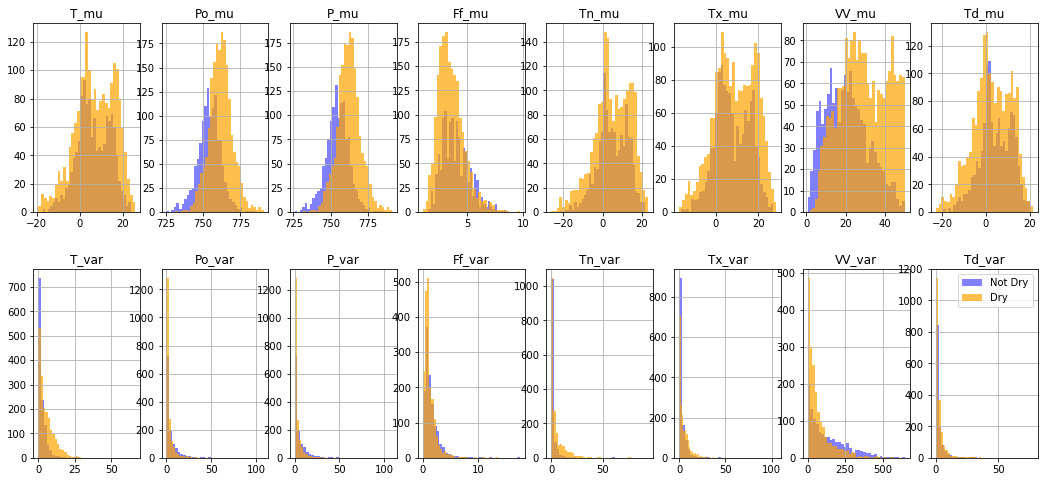

In [15]:
# To analyse feature-outcome distribution in visualisation
features = ['T_mu', 'Po_mu', 'P_mu', 'Ff_mu', 'Tn_mu', 'Tx_mu', 'VV_mu', 'Td_mu', 'T_var', 'Po_var', 'P_var', 'Ff_var', 'Tn_var', 'Tx_var', 'VV_var', 'Td_var']
ROWS, COLS = 2, 8
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#     df[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 4 lines
    trainset[trainset.OBSERVED==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    trainset[trainset.OBSERVED==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    plt.legend(['Not Dry', 'Dry'])
    fig.subplots_adjust(hspace=0.3)


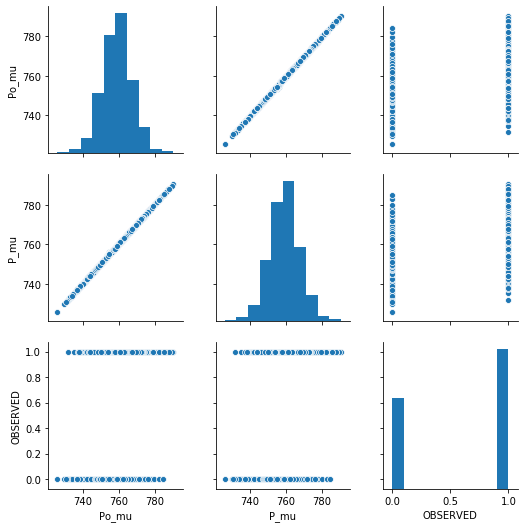

In [16]:
sns.pairplot(trainset[['Po_mu','P_mu','OBSERVED']])

In [5]:
X_test=pd.read_csv('weather_data_test.csv',index_col='datetime',sep=';',decimal=',',infer_datetime_format=True)
X_test.shape
y_test=pd.read_csv('weather_data_test_labels.csv',index_col='datetime',sep=';',decimal=',',infer_datetime_format=True)
y_test.shape

(1346, 2)

<font size=5>Standardization</font>

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features = scaler.transform(X_train)
# scaler1 = StandardScaler()
# scaler1.fit(X_test)
scaled_features1 = scaler.transform(X_test)


In [57]:
#KNN before scaling features
model= KNeighborsClassifier(n_neighbors=15)
model.fit(X_train,y_train['OBSERVED'])
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test['OBSERVED']))
print('\n')
print(confusion_matrix(y_pred,y_test['OBSERVED']))
print(accuracy_score(y_pred,y_test['OBSERVED']))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       470
           1       0.82      0.86      0.84       876

    accuracy                           0.79      1346
   macro avg       0.77      0.76      0.77      1346
weighted avg       0.79      0.79      0.79      1346



[[309 161]
 [119 757]]
0.7919762258543833


In [58]:
#KNN with scaled features
model= KNeighborsClassifier(n_neighbors=36)
model.fit(scaled_features,y_train['OBSERVED'])
y_pred = model.predict(scaled_features1)
print(classification_report(y_pred,y_test['OBSERVED']))
print('\n')
print(confusion_matrix(y_pred,y_test['OBSERVED']))
print(accuracy_score(y_pred,y_test['OBSERVED']))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       471
           1       0.83      0.87      0.85       875

    accuracy                           0.79      1346
   macro avg       0.78      0.76      0.77      1346
weighted avg       0.79      0.79      0.79      1346



[[311 160]
 [117 758]]
0.7942050520059435


Text(0, 0.5, 'Error Rate')

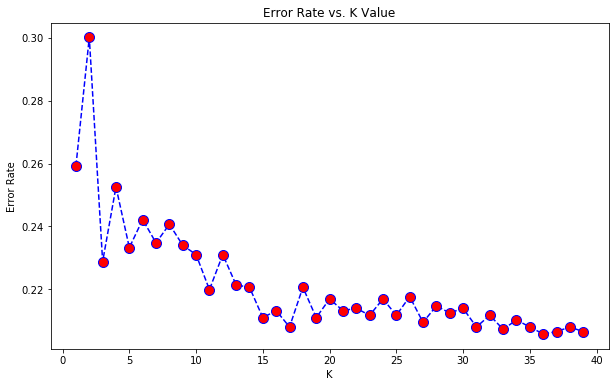

In [59]:
# error_rate = []
# for i in range(1,40):
    
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train,y_train['OBSERVED'])
#     pred_i = knn.predict(X_test)
#     error_rate.append(np.mean(pred_i != y_test['OBSERVED']))
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_features,y_train['OBSERVED'])
    pred_i = knn.predict(scaled_features1)
    error_rate.append(np.mean(pred_i != y_test['OBSERVED']))
m = min(error_rate)
min_ind = error_rate.index(m)
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [60]:
min_ind+1


36

In [61]:
#Logistic Regression without scaled features
modelL= LogisticRegression()
modelL.fit(X_train,y_train['OBSERVED'])
y_pred = modelL.predict(X_test)
print(classification_report(y_pred,y_test['OBSERVED']))
print('\n')
print(confusion_matrix(y_pred,y_test['OBSERVED']))
print(accuracy_score(y_pred,y_test['OBSERVED']))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       440
           1       0.82      0.83      0.83       906

    accuracy                           0.77      1346
   macro avg       0.73      0.73      0.73      1346
weighted avg       0.77      0.77      0.77      1346



[[277 163]
 [151 755]]
0.7667161961367014


In [7]:
modelL= LogisticRegression()
modelL.fit(scaled_features,y_train['OBSERVED'])
y_pred = modelL.predict(scaled_features1)
print(classification_report(y_pred,y_test['OBSERVED']))
print('\n')
print(confusion_matrix(y_pred,y_test['OBSERVED']))
print(accuracy_score(y_pred,y_test['OBSERVED']))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       466
           1       0.83      0.86      0.85       880

    accuracy                           0.79      1346
   macro avg       0.78      0.76      0.77      1346
weighted avg       0.79      0.79      0.79      1346



[[309 157]
 [119 761]]
0.7949479940564635


In [8]:
modelL= LogisticRegression(C=7.753)
modelL.fit(scaled_features,y_train['OBSERVED'])
y_pred = modelL.predict(scaled_features1)
print(classification_report(y_pred,y_test['OBSERVED']))
print('\n')
print(confusion_matrix(y_pred,y_test['OBSERVED']))
print(accuracy_score(y_pred,y_test['OBSERVED']))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       461
           1       0.83      0.87      0.85       885

    accuracy                           0.80      1346
   macro avg       0.78      0.77      0.77      1346
weighted avg       0.80      0.80      0.80      1346



[[309 152]
 [119 766]]
0.7986627043090639


<font size=5>PCA</font>

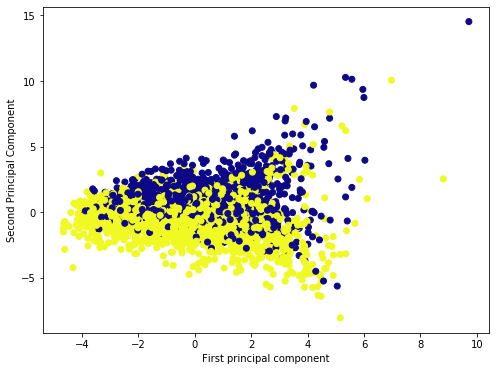

In [25]:
#PCA
pca = PCA(n_components=11)
pca.fit(scaled_features)
X_pca = pca.transform(scaled_features)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=trainset['OBSERVED'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
#pca.fit(scaled_features1)
X_pca_test = pca.transform(scaled_features1)
plt.show()

36

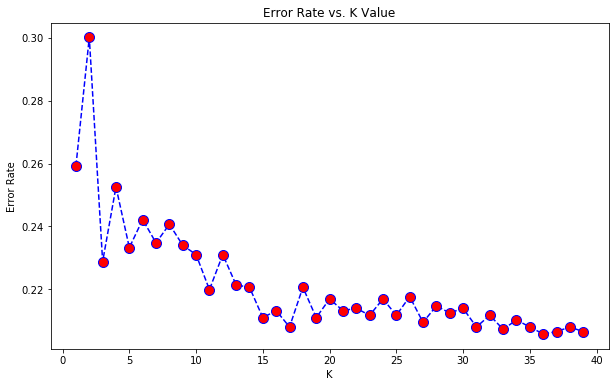

In [64]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_pca,y_train['OBSERVED'])
    pred_i = knn.predict(X_pca_test)
    error_rate.append(np.mean(pred_i != y_test['OBSERVED']))
m = min(error_rate)
min_ind = error_rate.index(m)
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
min_ind+1

In [66]:
#KNN after PCA
model= KNeighborsClassifier(n_neighbors=36)


model.fit(X_pca,y_train['OBSERVED'])
y_pred = model.predict(X_pca_test)
print(classification_report(y_pred,y_test['OBSERVED']))
print('\n')
print(confusion_matrix(y_pred,y_test['OBSERVED']))
print('Accuracy:',accuracy_score(y_pred,y_test['OBSERVED']))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       471
           1       0.83      0.87      0.85       875

    accuracy                           0.79      1346
   macro avg       0.78      0.76      0.77      1346
weighted avg       0.79      0.79      0.79      1346



[[311 160]
 [117 758]]
Accuracy: 0.7942050520059435


In [67]:
#Logistic Regression after PCA
modelL= LogisticRegression()
modelL.fit(X_pca,y_train['OBSERVED'])
y_pred = modelL.predict(X_pca_test)
print(classification_report(y_pred,y_test['OBSERVED']))

print('\n')


print(confusion_matrix(y_pred,y_test['OBSERVED']))
print('Accuracy:',accuracy_score(y_pred,y_test['OBSERVED']))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       466
           1       0.83      0.86      0.85       880

    accuracy                           0.79      1346
   macro avg       0.78      0.76      0.77      1346
weighted avg       0.79      0.79      0.79      1346



[[309 157]
 [119 761]]
Accuracy: 0.7949479940564635


In [26]:
## Model performance evaluation

# to give model baseline report in dataframe 
def performance_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    accuracy     = accuracy_score(y_test, y_pred)
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred) 
    rocauc       = roc_auc_score(y_test, y_pred)
    logloss      = log_loss(y_test, y_pred)
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'logloss'      : [logloss]})
                             #'timetaken'    : [0]       })   # timetaken for comparison later
    return df_model

# to evaluate baseline models
logit = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=33)
knnsc = KNeighborsClassifier()
#randomforest = RandomForestClassifier()
# to concat all models
df_models = pd.concat([performance_report(logit, scaled_features, scaled_features1, y_train['OBSERVED'], y_test['OBSERVED'], 'LogisticRegression'),
                       
                       performance_report(knn,scaled_features,scaled_features1, y_train['OBSERVED'], y_test['OBSERVED'], 'KNN'),
                      performance_report(logit, X_pca, X_pca_test, y_train['OBSERVED'], y_test['OBSERVED'], 'logistic Regression after PCA'),
                       performance_report(knn, X_pca, X_pca_test, y_train['OBSERVED'], y_test['OBSERVED'], 'KNN after PCA')
                       ], axis=0).reset_index()

df_models = df_models.drop('index', axis=1)
df_models

,model,accuracy,precision,recall,f1score,rocauc,logloss
0,LogisticRegression,0.794948,0.864773,0.828976,0.846496,0.775469,7.082316
1,KNN,0.792719,0.857783,0.834423,0.845941,0.768847,7.159302
2,logistic Regression after PCA,0.789747,0.867052,0.816993,0.841279,0.774151,7.261936
3,KNN after PCA,0.797177,0.861142,0.837691,0.849255,0.773986,7.005338


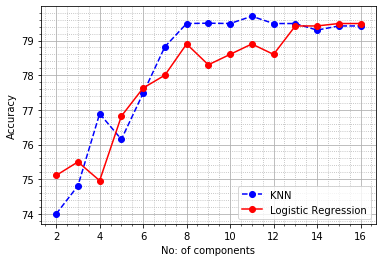

In [69]:
#Accuracy Vs No: of Components plot
knnp=[0.740,.7481,.7689,.7615,.7748,.7882,.7949,.795,.7949,.797,.7949,.7949,.793,.7942,.7942]
lrp=[.7511,.755,.7496,.7682,.7763,.78,.7890,.783,.786,.789,.786,.7942,.7942,.7949,.7949]
knnp=[i*100 for i in knnp]
lrp=[i*100 for i in lrp]
#f, ax = plt.subplots()
#x=plt.xlim(0,15)
plt.plot(range(2,2+len(knnp)),knnp, '--bo', label='KNN')
plt.plot(range(2,2+len(lrp)),lrp, '-ro', label='Logistic Regression')
#ax.set_xlim(0, 16)

plt.xlabel("No: of components")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.minorticks_on()
plt.grid(b=True, which='major', linestyle='-')
plt.grid(b=True, which='minor', linestyle=':')
plt.show()    

In [79]:
# Build PCA dataframe with projections of data on eigenvectors
pca_df = pd.DataFrame()
for i in range(pca.components_.shape[1]):
        pca_df['PCA_cmp' + str(i + 1)] = pca.components_[i, :]@ scaled_features.T

# Display sample of PCA dataframe
pca_df.head(5)


,PCA_cmp1,PCA_cmp2,PCA_cmp3,PCA_cmp4,PCA_cmp5,PCA_cmp6,PCA_cmp7,PCA_cmp8,PCA_cmp9,PCA_cmp10,PCA_cmp11,PCA_cmp12,PCA_cmp13,PCA_cmp14,PCA_cmp15,PCA_cmp16
0,-1.597323,1.369902,-1.088322,-1.003837,0.527500,-0.603659,0.588842,0.580921,0.177896,0.217448,0.227034,0.095819,-0.000808,0.000531,0.001412,0.000490
1,-1.428895,0.770860,0.336219,0.431522,0.466703,-0.799210,-0.285562,-0.455824,0.317243,0.620918,0.141248,-0.088980,0.089914,-0.052191,0.026397,-0.005170
2,-2.115870,-0.344940,-0.487298,0.216391,1.061982,-0.461752,1.316505,-0.044602,-0.408506,0.263015,0.370009,-0.017431,0.025087,-0.025849,0.006260,-0.001444
3,-2.132857,-1.227838,-0.654058,0.276633,1.298859,-0.919950,1.416722,0.256507,-0.094864,0.344554,0.137375,0.005964,0.094157,0.041283,-0.002626,0.002315
4,-1.925155,-0.537394,-0.815135,0.667565,0.994975,0.007075,0.837961,0.575342,0.185913,0.350180,0.035047,-0.092426,0.013965,-0.002003,-0.000618,0.000223


In [80]:
exp_df=pd.DataFrame({'Explained Variance':pca.explained_variance_.round(2),
                    'Explained Variance Ratio':pca.explained_variance_ratio_.round(2)},index=["P" + str(i) for i in range(1,17)]).T
exp_df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16
Explained Variance,4.30,3.18,2.39,1.27,1.06,0.90,0.86,0.79,0.57,0.48,0.16,0.03,0.01,0.0,0.0,0.0
Explained Variance Ratio,0.27,0.20,0.15,0.08,0.07,0.06,0.05,0.05,0.04,0.03,0.01,0.00,0.00,0.0,0.0,0.0


In [71]:
# Helper function to explain variance
def explain_variance(orig_var, pca_var):
    orig_var_total = sum(orig_var)
    pca_var_total = sum(pca_var)

    # cumsum()
    orig_cum = np.cumsum(orig_var)
    pca_cum = np.cumsum(pca_var)

    # turn cumsum() to percentages
    orig_cum = [x / orig_var_total for x in orig_cum]
    pca_cum = [x / pca_var_total for x in pca_cum]
    
    for i in range(len(pca_cum)):
        print(f'Percentage covered by PCA with {i+1} dimension: {pca_cum[i]}')

    print('Original var cumsum\n', orig_cum)
    print('Var cumsum after pca\n', pca_cum)

    f, ax = plt.subplots()
    ax.plot(range(1, 1 + len(orig_cum)), orig_cum, '--bo', label='Original variance per column')
    ax.plot(range(1, 1 + len(pca_cum)), pca_cum, '-ro', label='PCA explained variance per component')
    plt.minorticks_on()
    plt.grid(b=True, which='major', linestyle='-')
    plt.grid(b=True, which='minor', linestyle=':')
    plt.show()    

[0.03631958043296118, 0.017238384729092903, 0.017236418465670027, 0.01951100767763329, 0.03033767212944611, 0.038434359049325365, 0.06135556678947593, 0.033185140393346337, 0.006232624281355867, 0.004532034773629273, 0.004493866863111049, 0.005108354844433719, 0.005619023272554667, 0.0031815578719238996, 0.0273070819820077, 0.003373106861471047]
[4.29746623620822, 3.1788627940036323, 2.387290725409193, 1.2739943443583162, 1.0619397308928957, 0.9041949304469205, 0.8604459439620261, 0.7918530886712243, 0.5685837348762354, 0.4763638141377444, 0.16298674183072798, 0.03150938337181882, 0.007164756393710346, 0.0020276432642955303, 0.00040662145631487566, 6.675418870335016e-06]
Percentage covered by PCA with 1 dimension: 0.2685061010242356
Percentage covered by PCA with 2 dimension: 0.46712175210658824
Percentage covered by PCA with 3 dimension: 0.6162799047152556
Percentage covered by PCA with 4 dimension: 0.695879193069968
Percentage covered by PCA with 5 dimension: 0.7622292889153661
Perce

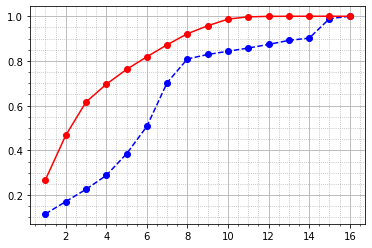

In [72]:
# To compare variances, we have to normalize original data
X_norm = (X_train - X_train.min(axis=0))/(X_train.max(axis=0) - X_train.min(axis=0))
# Compute variances by column
orig_var = X_norm.var().tolist()
pca_var = pca_df.var().tolist()

print(orig_var)
print(pca_var)
explain_variance(orig_var, pca_var)


<font size=5>Hyperparameter Tuning</font>

In [76]:
#Hyperparameter tuning
logit = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 1, 100]
hyperparameters = dict(C=C, penalty=penalty)
model = GridSearchCV(logit, hyperparameters,cv=5, verbose=0)
best_model = model.fit(X_train, y_train['OBSERVED'])
print('Best Parameters',model.best_params_)
#Prediction
y_pred=model.predict(X_test)

#evaluation(Accuracy)
print("Accuracy:",accuracy_score(y_pred,y_test['OBSERVED']))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",confusion_matrix(y_pred,y_test['OBSERVED']))



Best Parameters {'C': 100, 'penalty': 'l1'}
Accuracy: 0.7756315007429421
Confusion Metrix:
 [[293 167]
 [135 751]]


In [77]:
#kNearestNeighbors
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[15,20,25,26,27,28,37],
          'leaf_size':[1,2,3,5,30],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params,scoring='roc_auc', n_jobs=1)
#Learning
model1.fit(scaled_features,y_train['OBSERVED'])
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
y_pred=model1.predict(scaled_features1)

#evaluation(Accuracy)
print("Accuracy:",accuracy_score(y_pred,y_test['OBSERVED']))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",confusion_matrix(y_pred,y_test['OBSERVED']))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 37, 'weights': 'distance'}
Accuracy: 0.7949479940564635
Confusion Metrix:
 [[302 150]
 [126 768]]


In [78]:
#Model performance after hyperparameter tuning
def baseline_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    accuracy     = accuracy_score(y_test, y_pred)
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred) 
    rocauc       = roc_auc_score(y_test, y_pred)
    logloss      = log_loss(y_test, y_pred)
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'logloss'      : [logloss]})
                             #'timetaken'    : [0]       })   # timetaken for comparison later
    return df_model

# to evaluate baseline models
logit = LogisticRegression(penalty = 'l1', C = 100)
knn = KNeighborsClassifier(leaf_size= 1, n_jobs= -1, n_neighbors= 25, weights= 'distance')
knnsc = KNeighborsClassifier(leaf_size= 1, n_jobs= -1, n_neighbors= 37, weights= 'distance')
#randomforest = RandomForestClassifier(criterion='entropy', n_estimators= 100, n_jobs= -1, random_state= 42, verbose=0, warm_start= False)
# to concat all models
df_models = pd.concat([baseline_report(logit, X_train, X_test, y_train['OBSERVED'], y_test['OBSERVED'], 'LogisticRegression'),
                      # baseline_report(knn,X_train, X_test, y_train['OBSERVED'], y_test['OBSERVED'], 'KNN'),
                       baseline_report(knnsc,scaled_features,scaled_features1, y_train['OBSERVED'], y_test['OBSERVED'], 'KNN with scaled features'),
                       #baseline_report(randomforest, X_train, X_test, y_train['OBSERVED'], y_test['OBSERVED'], 'RandomForest')
                       ], axis=0).reset_index()

df_models = df_models.drop('index', axis=1)
df_models

,model,accuracy,precision,recall,f1score,rocauc,logloss
0,LogisticRegression,0.780089,0.851016,0.821351,0.835920,0.756470,7.59553
1,KNN with scaled features,0.794948,0.859060,0.836601,0.847682,0.771104,7.08232


In [24]:
pca = PCA(n_components=11)
pca.fit(scaled_features)
X_pca = pca.transform(scaled_features)

X_pca_test = pca.transform(scaled_features1)
#Logistic Regression after PCA
modelL= LogisticRegression()
modelL.fit(X_pca,y_train['OBSERVED'])
y_pred = modelL.predict(X_pca_test)
print(classification_report(y_pred,y_test['OBSERVED']))

print('\n')


print(confusion_matrix(y_pred,y_test['OBSERVED']))
print('Accuracy:',accuracy_score(y_pred,y_test['OBSERVED']))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69       481
           1       0.82      0.87      0.84       865

    accuracy                           0.79      1346
   macro avg       0.77      0.76      0.76      1346
weighted avg       0.79      0.79      0.79      1346



[[313 168]
 [115 750]]
Accuracy: 0.7897473997028231


In [20]:
pca = PCA(n_components=0.99)
pca.fit(scaled_features)
X_pca = pca.transform(scaled_features)
print('Original number of features:', X_train.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 16
Reduced number of features: 11
